In [97]:
import pandas as pd
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_json("/Users/vikash/Downloads/Sarcasm_Headlines_Dataset.json",lines=True)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [98]:
df.head()


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0


null values:

 article_link    0
headline        0
is_sarcastic    0
dtype: int64
---/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/---
Duplicate rows: 26708
After Removal 0
---/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/---
Shape of the data:

 (26708, 3)
---/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/---

We have 263022 words in the headline

---/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/------/---

is_ sarcastic value count:

 is_sarcastic
0    14984
1    11724
Name: count, dtype: int64


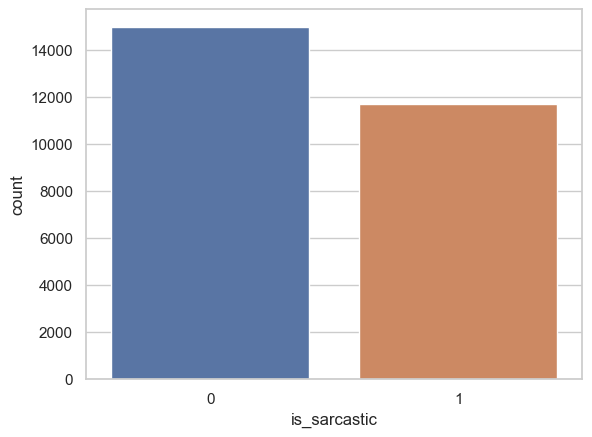

In [100]:

df.head(10)
print('null values:\n\n',df.isnull().sum())
print(20*'---/---')
print("Duplicate rows:", len(df.duplicated()))
df = df.drop_duplicates()
print('After Removal',(df.duplicated().sum()))
print(20*'---/---')
print('Shape of the data:\n\n',df.shape)
print(20*'---/---')
df_len = df['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'\nWe have {df_len} words in the headline\n')
print(20*'---/---')
print('\nis_ sarcastic value count:\n\n',df.is_sarcastic.value_counts())
sns.countplot(data=df, x='is_sarcastic')
plt.show()

In [101]:
df1 = df.drop('article_link', axis=1)
df1.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0


In [102]:
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))

def clean_txt(text):
    text = re.sub(r"[^A-Za-z!?]", " ", text)  # Modify the regular expression pattern to exclude '?'
    text = re.sub(r'\[[^]]*\]', " ", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'t", "", text)
    text = re.sub(r"\'re", "", text)
    text = re.sub(r"\'d", "", text)
    text = re.sub(r"\'ll", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\(", " ", text)
    text = re.sub(r"\)", " ", text)
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

# Now, you can apply the clean_txt function to your DataFrame column
df1['headline'] = df1['headline'].apply(clean_txt)


In [103]:
df1.head(20)

,headline,is_sarcastic
0,former versace store clerk sues secret black code minority shoppers,0
1,roseanne revival catches thorny political mood better worse,0
2,mom starting fear son web series closest thing grandchild,1
3,boehner wants wife listen come alternative debt reduction ideas,1
4,j k rowling wishes snape happy birthday magical way,0
5,advancing world women,0
6,fascinating case eating lab grown meat,0
7,ceo send kids school work company,0
8,top snake handler leaves sinking huckabee campaign,1
9,friday morning email inside trump presser ages,0


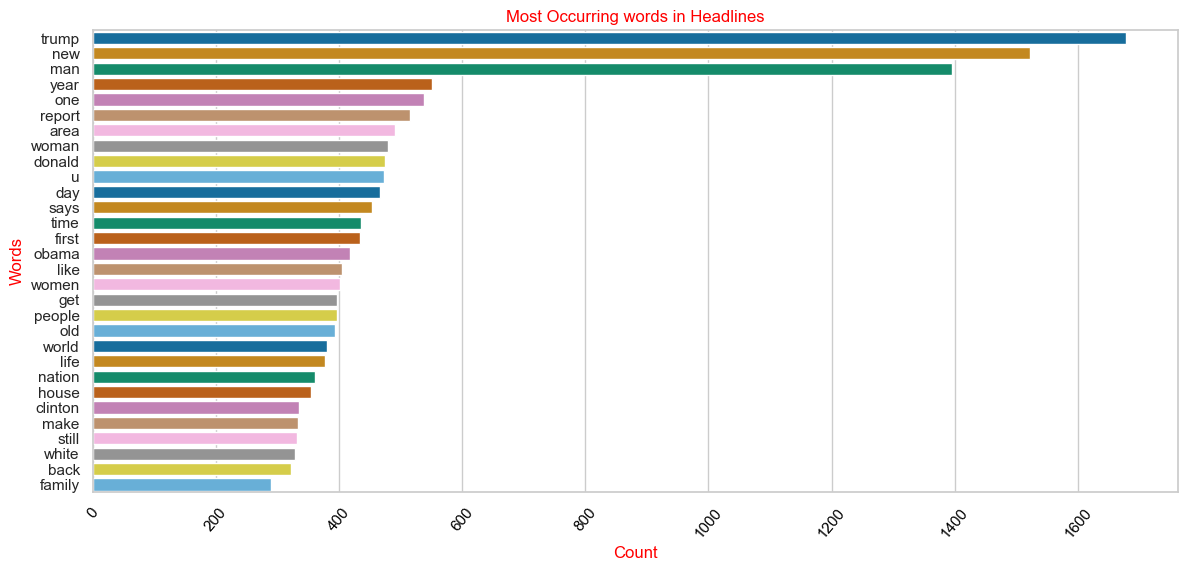

In [104]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

text = df1['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0)

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6))

sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette='colorblind')
plt.ylabel('Words', color="red")
plt.xlabel('Count', color="red")
plt.title("Most Occurring words in Headlines", color="red")
plt.xticks(rotation=50)
ax.tick_params(axis='x', colors='black')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X = df1['headline']
y = df1['is_sarcastic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2989
           1       0.78      0.69      0.73      2353

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



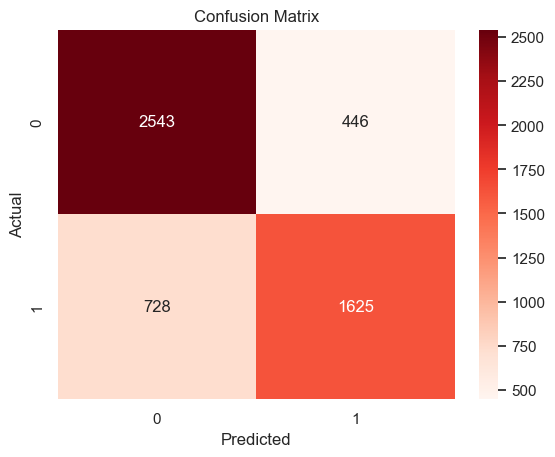

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2989
           1       0.77      0.73      0.75      2353

    accuracy                           0.79      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.79      0.79      0.79      5342



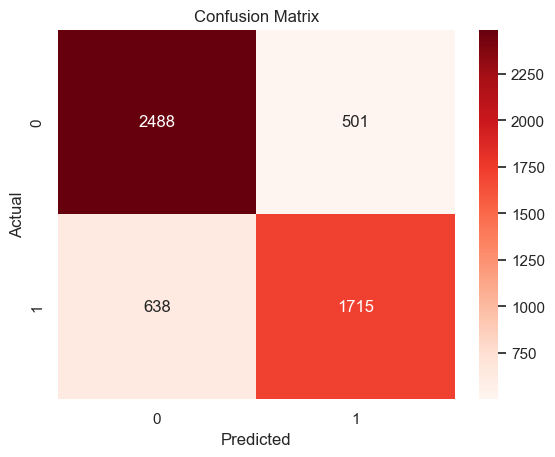

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB

binary_vectorizer = CountVectorizer(max_features=5000, binary=True)  # You can adjust max_features as needed
X_train_binary = binary_vectorizer.fit_transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

# Train the BernoulliNB classifier
bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)

# Make predictions on the test data
y_pred = bnb.predict(X_test_binary)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [124]:
import joblib


joblib.dump(bnb, 'bernoulli_nb_model.pkl')

# Later, when you want to use the saved model for testing on new data
loaded_bnb = joblib.load('bernoulli_nb_model.pkl')

# Input text from the user
user_input = input("Enter the text you want to classify: ")
user_texts = [user_input]

# Transform the user's text using the same binary vectorizer
user_binary = binary_vectorizer.transform(user_texts)

# Make predictions using the loaded BernoulliNB model
user_predictions = loaded_bnb.predict(user_binary)

# Classify the user's text
label = "Sarcastic" if user_predictions[0] == 1 else "Non-Sarcastic"
print(f'Text: "{user_input}" - Predicted Label: {label}')

Text: "Economic Growth Predicted for the Coming Year, Says Leading Economist" - Predicted Label: Non-Sarcastic


Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2989
           1       0.78      0.69      0.73      2353

    accuracy                           0.78      5342
   macro avg       0.78      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



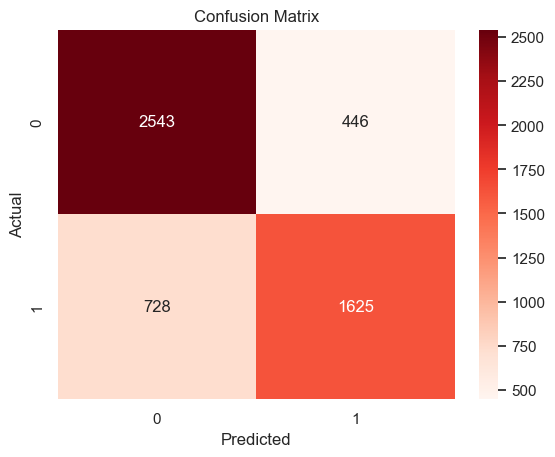

In [116]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test_tfidf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [118]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

max_words = 10000  # You can adjust this value
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 50  # You can adjust this value
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Create an LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train_padded, y_train, epochs=20, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Evaluate the model
accuracy = model.evaluate(X_test_padded, y_test)
print(f'Accuracy: {accuracy[1]:.2f}')

loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
y_pred = model.predict(X_test_padded)
y_pred = (y_pred > 0.5)  

y_test_binary = np.array(y_test)

report = classification_report(y_test_binary, y_pred)

print(report)
confusion = confusion_matrix(y_test_binary, y_pred)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Sarcastic', 'Sarcastic'], yticklabels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/20


2023-11-07 13:58:59.172593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-07 13:58:59.173636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-07 13:58:59.174434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

668/668 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5626

2023-11-07 13:59:31.600717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-07 13:59:31.601632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-07 13:59:31.602551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

668/668 [==============================] - 34s 50ms/step - loss: 0.6834 - accuracy: 0.5626 - val_loss: 0.6887 - val_accuracy: 0.5595
Epoch 2/20
668/668 [==============================] - 31s 47ms/step - loss: 0.6866 - accuracy: 0.5600 - val_loss: 0.6868 - val_accuracy: 0.5595
Epoch 3/20
668/668 [==============================] - 30s 45ms/step - loss: 0.6864 - accuracy: 0.5614 - val_loss: 0.6861 - val_accuracy: 0.5595
Epoch 4/20
167/167 [==============================] - 2s 12ms/step - loss: 0.6887 - accuracy: 0.5595
Accuracy: 0.56
167/167 [==============================] - 2s 12ms/step - loss: 0.6887 - accuracy: 0.5595
Test Loss: 0.6887, Test Accuracy: 0.5595


In [121]:
model.save('sarcasm_detection_model.h5')

# Later, when you want to use the saved model for testing on new data
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('sarcasm_detection_model.h5')

# Now you can use the loaded model to make predictions on new data
user_input = input("Enter the text you want to classify: ")
user_texts = [user_input]

user_sequences = tokenizer.texts_to_sequences(user_texts)
max_sequence_length = 50  # You can adjust this value
user_padded = pad_sequences(user_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Make predictions using the loaded model
predictions = loaded_model.predict(user_padded)

# Classify the user's text
label = "Sarcastic" if predictions[0][0] > 0.5 else "Non-Sarcastic"
print(f'Text: "{user_input}" - Predicted Label: {label} (Probability: {predictions[0][0]:.4f})')

2023-11-07 14:10:52.336169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-07 14:10:52.337354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-07 14:10:52.338210: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 241ms/step
Text: ""Traffic Jams Expected to Disappear Overnight Thanks to New Unicorn-Powered Cars"" - Predicted Label: Non-Sarcastic (Probability: 0.4768)


2023-11-07 14:10:54.941676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-11-07 14:10:54.942945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-11-07 14:10:54.943750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [128]:

import requests
import pandas as pd

# Function to check if a link is valid
def is_valid_link(link):
    try:
        response = requests.get(link)
        if response.status_code >= 200 and response.status_code < 300:
            return True
        else:
            return False
    except requests.exceptions.RequestException:
        return False

# User input for a link
user_link = input("Enter a link to check its validity: ")

# Check the validity of the user-provided link
if is_valid_link(user_link):
    print("The provided link is valid.")
else:
    print("The provided link is invalid.")


The provided link is valid.
